In [1]:
import torch

In [2]:
import numpy as np

In [3]:
import torchvision
from torchvision.datasets import MNIST

In [6]:
dataset = MNIST(root='data/',download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw




Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw

Processing...


C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [7]:
len(dataset)

60000

In [9]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [10]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x273645B6130>, 5)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


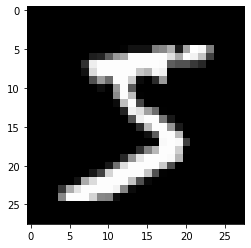

In [13]:
image , label = dataset[0]
plt.imshow(image,cmap='gray')
print('Label:',label)

Label: 3


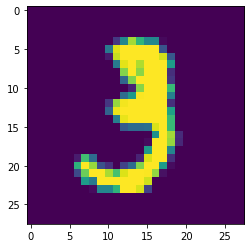

In [15]:
image , label = dataset[10]
plt.imshow(image)
print('Label:',label)

In [16]:
import torchvision.transforms as transforms

In [18]:
dataset = MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [19]:
img_tensor , label = dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [20]:
print(img_tensor[:,10:20,5:17])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.0039, 0.6039, 0.9922,
          0.3529, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5451, 0.9922,
          0.7451, 0.0078, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0431, 0.7451,
          0.9922, 0.2745, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1373,
          0.9451, 0.8824, 0.6275, 0.4235],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.3176, 0.9412, 0.9922, 0.9922],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.1765, 0.7294, 0.9922],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0627, 0.3647],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

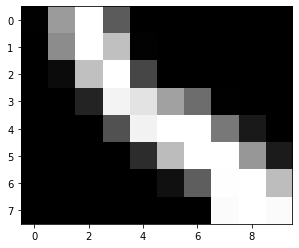

In [23]:
plt.imshow(img_tensor[0,10:18,10:20],cmap='gray')

In [24]:
import numpy as np
def split_indices(n,val_pct):
    # Determine size of validation
    n_val = int(val_pct*n)
    #create random permutation of 0 to n-1
    idxs = np.random.permutation(n)
    # pick first n_val indices for validation set
    return idxs[n_val:] , idxs[:n_val]

In [25]:
train_indices , val_indices = split_indices(len(dataset),val_pct=0.2)

In [26]:
print(len(train_indices),len(val_indices))

48000 12000


In [27]:
print('Sample validation indices :',val_indices[:20])

Sample validation indices : [ 7234 17462 43486 34792  4443 24357 56683 53849 21052 51521 35024 54549
 44137 42781 21053 23662  2483 57388 19950 58302]


In [28]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [29]:
batch_size = 100

# traning sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,batch_size,sampler=train_sampler)

# validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,batch_size,sampler=val_sampler)

In [34]:
import torch.nn as nn

input_size = 28*28 # each image is 28 X 28 Pixels 
num_classes = 10 # we want 10 class classifier
# Logistic regression model
model = nn.Linear(input_size,num_classes)


In [35]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0217, -0.0010,  0.0330,  ..., -0.0338,  0.0123,  0.0158],
        [-0.0005, -0.0003,  0.0080,  ..., -0.0265,  0.0174,  0.0347],
        [ 0.0180,  0.0324,  0.0122,  ...,  0.0110,  0.0119,  0.0182],
        ...,
        [ 0.0278,  0.0216,  0.0144,  ..., -0.0066, -0.0039, -0.0046],
        [ 0.0165, -0.0234, -0.0140,  ...,  0.0102, -0.0057, -0.0333],
        [ 0.0252,  0.0129,  0.0149,  ...,  0.0126, -0.0051,  0.0056]],
       requires_grad=True)

In [36]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0299, -0.0145, -0.0270, -0.0019,  0.0097, -0.0157, -0.0310, -0.0317,
         0.0167, -0.0334], requires_grad=True)

In [37]:
for images , labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([3, 4, 9, 1, 7, 9, 2, 3, 7, 2, 4, 7, 4, 0, 9, 9, 4, 0, 6, 1, 0, 5, 7, 4,
        7, 2, 1, 6, 0, 7, 3, 3, 1, 8, 8, 2, 0, 2, 0, 2, 7, 8, 8, 4, 7, 7, 1, 3,
        1, 6, 8, 7, 5, 1, 0, 5, 1, 9, 7, 8, 7, 7, 2, 1, 3, 1, 1, 4, 8, 0, 7, 6,
        5, 8, 7, 4, 5, 5, 7, 9, 6, 9, 3, 1, 5, 8, 4, 9, 0, 8, 8, 1, 1, 1, 6, 6,
        9, 8, 0, 6])
torch.Size([100, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2800x28 and 784x10)

In [39]:
class MnistModel (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [40]:
print(model.linear.weight.shape,model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 3.0882e-02,  2.3654e-02,  6.5036e-05,  ...,  1.8945e-03,
           2.4898e-02,  2.4908e-02],
         [ 1.6901e-02,  1.5051e-02,  2.8067e-02,  ...,  1.1164e-02,
          -2.8025e-02,  1.9563e-03],
         [ 2.7879e-02,  1.2259e-02, -3.0292e-02,  ...,  7.3266e-03,
          -3.8914e-03,  3.2536e-02],
         ...,
         [ 7.6133e-03,  3.5154e-02, -1.9071e-02,  ...,  1.0946e-02,
           1.7908e-02,  2.6329e-03],
         [ 1.6540e-02,  3.4435e-02,  1.6972e-02,  ..., -1.7516e-02,
           1.9953e-02,  1.5761e-02],
         [-2.2118e-02, -3.1093e-04,  3.5079e-02,  ..., -1.4651e-02,
          -3.1057e-02,  1.6230e-03]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0065,  0.0237,  0.0325, -0.0313,  0.0078, -0.0024,  0.0086,  0.0221,
          0.0265,  0.0096], requires_grad=True)]

In [41]:
for images , labels in train_loader:
    outputs = model(images)
    break

print('Output.shape:',outputs.shape)
print('Sample outputs:\n',outputs[:2].data)

Output.shape: torch.Size([100, 10])
Sample outputs:
 tensor([[-0.3322, -0.3167, -0.4098,  0.0396,  0.3996, -0.1430,  0.0510,  0.0071,
          0.3350,  0.2893],
        [ 0.2567, -0.2847, -0.3313, -0.0344,  0.2098, -0.3930,  0.2134,  0.0387,
          0.2717,  0.1394]])


In [42]:
import torch.nn.functional as F

In [46]:
# apply softmax for each output row
probs = F.softmax(outputs,dim=1)

# Look at sample probability
print('Sample Probability:\n',probs[:2].data)

# add up the probabilities of an output row
print('Sum of Probability:',torch.sum(probs[0]).item())

Sample Probability:
 tensor([[0.0696, 0.0707, 0.0644, 0.1010, 0.1448, 0.0841, 0.1022, 0.0978, 0.1357,
         0.1297],
        [0.1246, 0.0725, 0.0692, 0.0931, 0.1189, 0.0651, 0.1193, 0.1002, 0.1265,
         0.1108]])
Sum of Probability: 1.0000001192092896


In [47]:
max_probs , preds = torch.max(probs,dim=1)
print(preds)
print(max_probs)

tensor([4, 8, 5, 4, 3, 7, 3, 6, 8, 4, 9, 3, 4, 4, 5, 4, 6, 7, 9, 3, 6, 3, 3, 3,
        4, 6, 8, 8, 8, 8, 9, 4, 6, 2, 5, 7, 6, 3, 9, 8, 9, 5, 8, 5, 9, 8, 6, 4,
        4, 9, 8, 5, 7, 8, 7, 8, 5, 8, 7, 0, 8, 5, 7, 4, 9, 4, 0, 0, 9, 4, 6, 8,
        3, 0, 0, 6, 4, 4, 5, 7, 8, 8, 4, 0, 3, 5, 5, 4, 8, 4, 6, 6, 2, 4, 8, 0,
        5, 3, 7, 0])
tensor([0.1448, 0.1265, 0.1307, 0.1284, 0.1447, 0.1313, 0.1326, 0.1366, 0.1444,
        0.1580, 0.1291, 0.1473, 0.1707, 0.1518, 0.1246, 0.1295, 0.1377, 0.1488,
        0.1163, 0.1207, 0.1186, 0.1216, 0.1317, 0.1244, 0.1517, 0.1324, 0.1222,
        0.1347, 0.1277, 0.1284, 0.1181, 0.1185, 0.1295, 0.1122, 0.1362, 0.1107,
        0.1161, 0.1262, 0.1329, 0.1340, 0.1268, 0.1201, 0.1255, 0.1475, 0.1355,
        0.1214, 0.1350, 0.1245, 0.1322, 0.1234, 0.1158, 0.1230, 0.1256, 0.1414,
        0.1368, 0.1285, 0.1207, 0.1181, 0.1275, 0.1265, 0.1300, 0.1265, 0.1233,
        0.1418, 0.1514, 0.1291, 0.1280, 0.1257, 0.1137, 0.1421, 0.1244, 0.1318,
        0.1288, 0.1

In [48]:
labels

tensor([3, 3, 6, 6, 4, 0, 8, 6, 3, 7, 6, 6, 7, 4, 2, 0, 4, 0, 4, 5, 1, 2, 6, 8,
        3, 9, 3, 4, 3, 8, 3, 8, 9, 1, 6, 2, 9, 0, 3, 9, 8, 4, 8, 6, 3, 5, 6, 5,
        5, 9, 1, 9, 5, 3, 8, 9, 1, 2, 8, 5, 5, 2, 3, 5, 2, 8, 3, 5, 1, 7, 4, 9,
        5, 0, 3, 8, 7, 0, 6, 5, 1, 3, 8, 0, 6, 1, 2, 3, 8, 5, 4, 6, 3, 8, 4, 9,
        6, 0, 4, 6])